### Organizando os dados


Trabalhando com os dados em função da pressão.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import scipy
import sklearn

In [2]:
df_pbe = pd.read_csv("./pbe+d2/struct_press_data")
df_df2 = pd.read_csv("./dft-df2/struct_press_data")
df_rvv10 = pd.read_csv("./rvv10/struct_press_data")

In [3]:
def gera_dados(ARQUIVO):
    x, y = [], []
    for linha in open(ARQUIVO, "r"):
        dados = [float(j) for j in linha.split()]
        x.append(dados[0])
        y.append(dados[1])
    return x, y


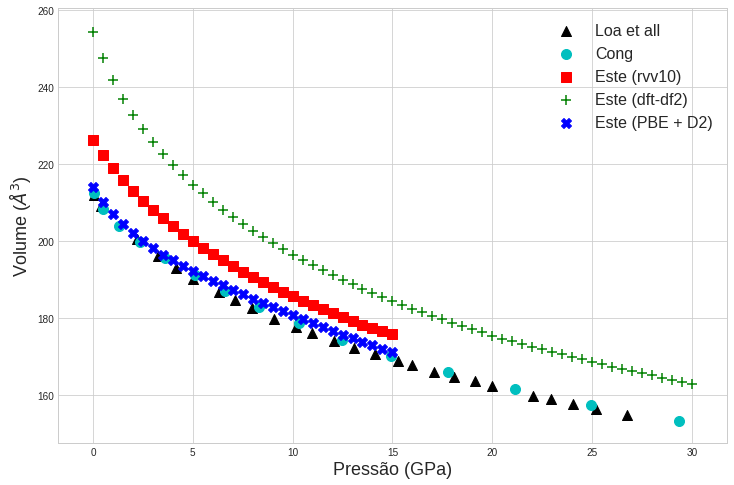

In [4]:
fig = plt.figure(figsize=(12,8))

volume, pressao = gera_dados("./../LOA_PV.csv")
plt.scatter(pressao, volume, label="Loa et all", marker="^", c="black", s=100)

volume, pressao = gera_dados("./../CONG_PV.csv")
plt.scatter(pressao, volume, label="Cong", marker="o", c="c", s=100)

plt.scatter(df_rvv10["pressao(Kbar)"].to_numpy()/10, df_rvv10["volume(Ang^3)"].to_numpy(),\
            label="Este (rvv10)", marker="s", c="red", s=100)

plt.scatter(df_df2["pressao(Kbar)"].to_numpy()/10, df_df2["volume(Ang^3)"].to_numpy(),\
            label="Este (dft-df2)", marker="+", c="g", s=100)

plt.scatter(df_pbe["pressao(Kbar)"].to_numpy()/10, df_pbe["volume(Ang^3)"].to_numpy(),\
            label="Este (PBE + D2)", marker="X", c="b", s=100)

plt.ylabel("Volume ($\AA^3$)", fontsize = 18)
plt.xlabel("Pressão (GPa)", fontsize = 18)
plt.legend(fontsize = 16)

fig.savefig('Diagrama_PV.png')

Padronizando as cores para as direções cristalinas:

    Direção a = Azul

    Direção b = Vermelho
    
    Direção c = Verde

In [5]:
def plot_eixos(data_frame, titulo):
    plt.scatter(data_frame["pressao(Kbar)"].to_numpy()/10, data_frame["a"].to_numpy()/2.95 ,\
            c="blue", label="Direção a / 2.95", s=60)
    
    plt.scatter(data_frame["pressao(Kbar)"].to_numpy()/10, data_frame["b"].to_numpy(),\
            c="red", label="Direção b", s=60)

    plt.scatter(data_frame["pressao(Kbar)"].to_numpy()/10, data_frame["c"].to_numpy(),\
            c="green", label="Direção c", s=60)
    
    plt.plot(axes_a[:,0], axes_a[:,1]/2.95, label="Loa - a / 2.95", c="blue")
    plt.plot(axes_b[:,0], axes_b[:,1], label="Loa - b", c="red")
    plt.plot(axes_c[:,0], axes_c[:,1], label="Loa - c", c="green")

    plt.title(titulo)
    plt.ylabel("Vetores de rede (Ang)")
    plt.xlabel("Pressão (GPa)")
    plt.xlim(0,31)
    plt.legend()
    plt.show()

In [6]:
def plot_eixos_reduzidos(data_frame, titulo):
    plt.scatter(data_frame["pressao(Kbar)"].to_numpy()/10,\
                data_frame["a"].to_numpy()/data_frame["a"].to_numpy()[0] ,\
                c="blue", label="$a/a_0$", s=60)
    
    plt.scatter(data_frame["pressao(Kbar)"].to_numpy()/10,\
                data_frame["b"].to_numpy()/data_frame["b"].to_numpy()[0],\
                c="red", label="$b/b_0$", s=60)

    plt.scatter(data_frame["pressao(Kbar)"].to_numpy()/10,\
                data_frame["c"].to_numpy()/data_frame["c"].to_numpy()[0],\
                c="green", label="$c/c_0$", s=60)
    
    plt.plot(axes_a[:,0], axes_a[:,1]/axes_a[0,1], label="Loa - $a/a_0$", c="blue")
    plt.plot(axes_b[:,0], axes_b[:,1]/axes_b[0,1], label="Loa - $b/b_0$", c="red")
    plt.plot(axes_c[:,0], axes_c[:,1]/axes_c[0,1], label="Loa - $b/b_0$", c="green")

    plt.title(titulo)
    plt.ylabel("Vetores de rede reduzidos")
    plt.xlabel("Pressão (GPa)")
    plt.xlim(0,31)
    plt.legend()
    plt.show()


In [7]:
def plot_razoes_eixos(data_frame, titulo):
    plt.scatter(data_frame["pressao(Kbar)"].to_numpy()/10,\
                data_frame["b"].to_numpy()/data_frame["a"].to_numpy() ,\
                c="blue", label="$b/a$", s=60)
    
    plt.scatter(data_frame["pressao(Kbar)"].to_numpy()/10,\
                data_frame["c"].to_numpy()/data_frame["a"].to_numpy(),\
                c="red", label="$c/a$", s=60)

    plt.scatter(data_frame["pressao(Kbar)"].to_numpy()/10,\
                (data_frame["c"].to_numpy()/data_frame["b"].to_numpy())*(1/2.5),\
                c="green", label="$c/b$", s=60)
    
    plt.plot(b_sobre_a[:,0], b_sobre_a[:,1], label="Loa - $b/a$", c="blue")
    plt.plot(c_sobre_a[:,0], c_sobre_a[:,1], label="Loa - $c/a$", c="red")
    plt.plot(c_sobre_b[:,0], c_sobre_b[:,1]/2.5, label="Loa - $c/b$", c="green")

    plt.title(titulo)
    plt.ylabel("Razão entre eixos")
    plt.xlabel("Pressão (GPa)")
    plt.xlim(0,31)
    plt.legend()
    plt.show()


In [8]:
axes_a = pd.read_csv("/home/murilo/Desktop/SnSe/artigos/Loa/Lattice_parameters_A.csv")
axes_b = pd.read_csv("/home/murilo/Desktop/SnSe/artigos/Loa/Lattice_parameters_B.csv")
axes_c = pd.read_csv("/home/murilo/Desktop/SnSe/artigos/Loa/Lattice_parameters_C.csv")

axes_a = axes_a.to_numpy()
axes_a[:,1] = axes_a[:,1]*np.sqrt(8)

axes_b = axes_b.to_numpy()
axes_c = axes_c.to_numpy()


b_sobre_a = pd.read_csv("/home/murilo/Desktop/SnSe/artigos/Loa/b_sobre_a.csv", sep=";")
c_sobre_a = pd.read_csv("/home/murilo/Desktop/SnSe/artigos/Loa/c_sobre_a.csv", sep=";")
c_sobre_b = pd.read_csv("/home/murilo/Desktop/SnSe/artigos/Loa/c_sobre_b.csv", sep=";")

b_sobre_a = b_sobre_a.to_numpy()
c_sobre_a = c_sobre_a.to_numpy()
c_sobre_b = c_sobre_b.to_numpy()


## Tamanho dos eixos

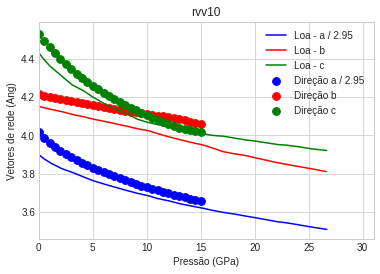

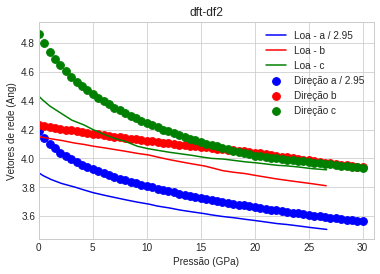

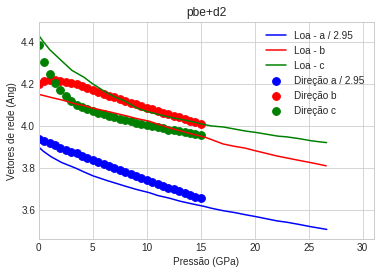

In [9]:
plot_eixos(df_rvv10, "rvv10")
plot_eixos(df_df2, "dft-df2")
plot_eixos(df_pbe, "pbe+d2")

## Eixos reduzidos

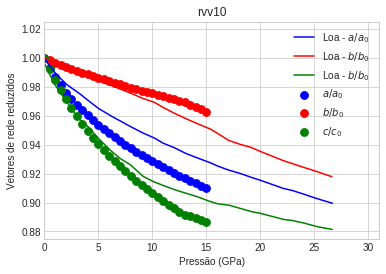

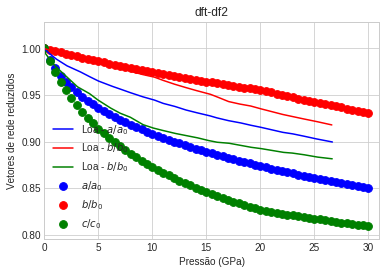

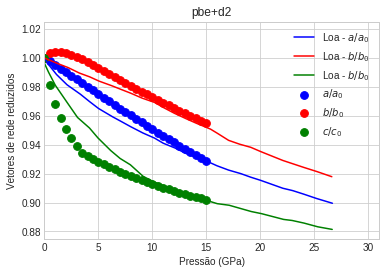

In [10]:
plot_eixos_reduzidos(df_rvv10, "rvv10")
plot_eixos_reduzidos(df_df2, "dft-df2")
plot_eixos_reduzidos(df_pbe, "pbe+d2")

## Razões entre os eixos

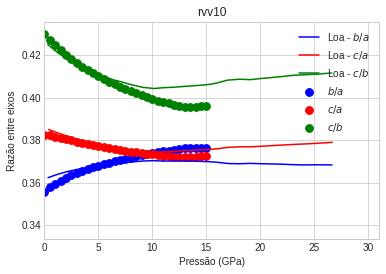

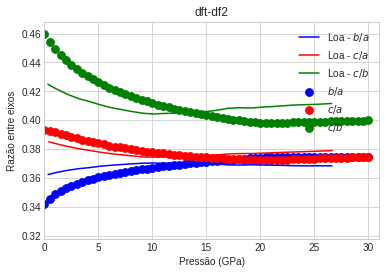

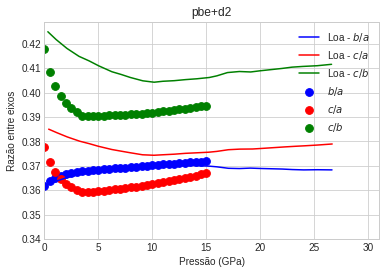

In [11]:
plot_razoes_eixos(df_rvv10, "rvv10")
plot_razoes_eixos(df_df2, "dft-df2")
plot_razoes_eixos(df_pbe, "pbe+d2")

## Coordenadas fracionárias dos Átomos

In [12]:
def plot_frac(DATA,ATOMO,LABEL):
    
    plt.scatter(DATA["pressao(Kbar)"].to_numpy()/10,\
    DATA[ATOMO].to_numpy(), label=ATOMO, s=60)

    
    plt.ylabel("Coordenada fracionária")
    plt.xlabel("Pressão (GPa)")
    plt.legend()
    plt.title(str(LABEL))

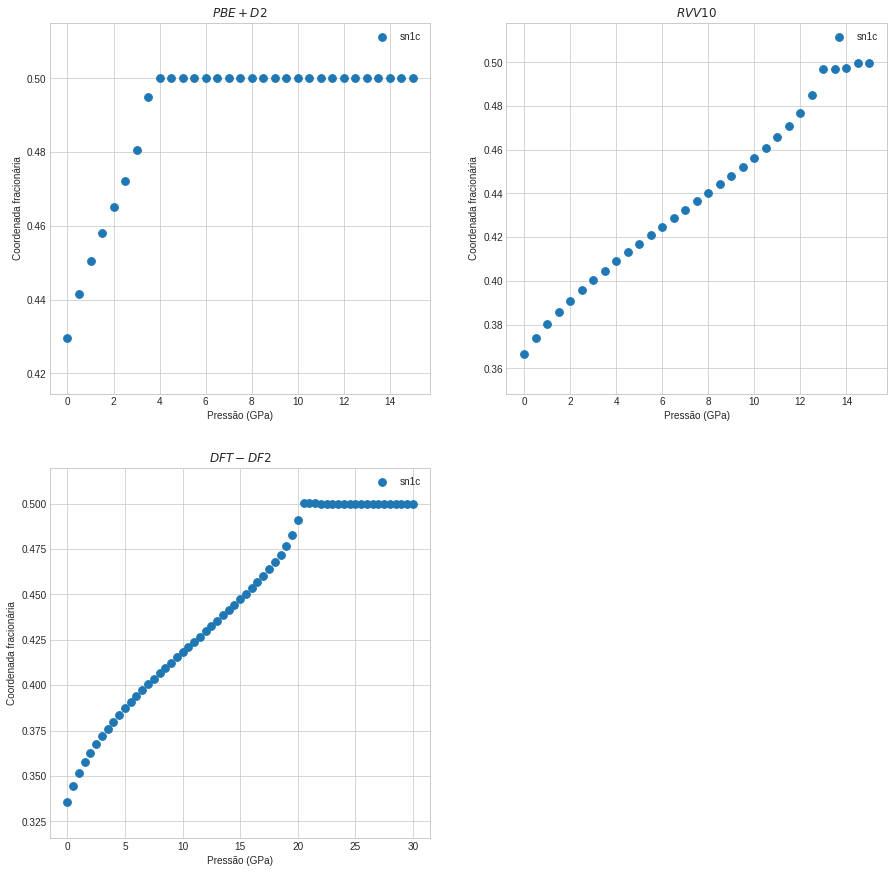

In [13]:
plt.figure(figsize = (15, 15))

plt.subplot(2,2,1)
plot_frac(df_pbe,"sn1c", "$PBE + D2$")

plt.subplot(2,2,2)
plot_frac(df_rvv10,"sn1c", "$RVV10$")

plt.subplot(2,2,3)
plot_frac(df_df2,"sn1c", "$DFT-DF2$")

plt.show()

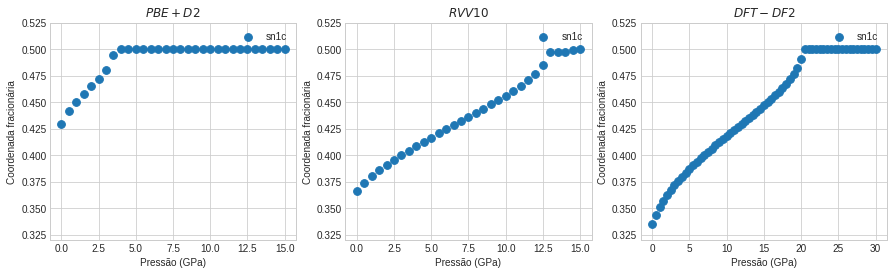

In [14]:
plt.figure(figsize = (15, 4))

plt.subplot(1,3,1)
plot_frac(df_pbe,"sn1c", "$PBE + D2$")
plt.ylim(0.320, 0.525)

plt.subplot(1,3,2)
plot_frac(df_rvv10,"sn1c", "$RVV10$")
plt.ylim(0.320, 0.525)

plt.subplot(1,3,3)
plot_frac(df_df2,"sn1c", "$DFT-DF2$")
plt.ylim(0.320, 0.525)

plt.show()

In [15]:
df_pbe

,pressao(Kbar),volume(Ang^3),densidade(g/cm^3),a,b,c,sn1a,sn1b,sn1c,sn2a,...,se1c,se2a,se2b,se2c,se3a,se3b,se3c,se4a,se4b,se4c
0,0,214.16682,6.13052,11.616734,4.202112,4.387332,0.631240,0.25,0.429545,0.368760,...,-5.756808e-03,0.636642,0.75,1.005757,0.136642,0.75,0.494243,0.863358,0.25,0.505757
1,5,210.11848,6.24864,11.586265,4.214682,4.302848,0.631962,0.25,0.441576,0.368038,...,-5.782144e-03,0.635252,0.75,1.005782,0.135252,0.75,0.494218,0.864748,0.25,0.505782
2,10,206.98132,6.34335,11.556343,4.218179,4.246056,0.632345,0.25,0.450604,0.367655,...,-5.055709e-03,0.634313,0.75,1.005056,0.134313,0.75,0.494944,0.865687,0.25,0.505056
3,15,204.36898,6.42443,11.526859,4.217394,4.203972,0.632555,0.25,0.458169,0.367445,...,-4.054131e-03,0.633614,0.75,1.004054,0.133614,0.75,0.495946,0.866386,0.25,0.504054
4,20,202.09118,6.49684,11.497922,4.214362,4.170577,0.632671,0.25,0.465190,0.367329,...,-2.991894e-03,0.633056,0.75,1.002992,0.133056,0.75,0.497008,0.866944,0.25,0.502992
5,25,200.05385,6.56301,11.469443,4.209962,4.143110,0.632729,0.25,0.472242,0.367271,...,-1.942799e-03,0.632589,0.75,1.001943,0.132589,0.75,0.498057,0.867411,0.25,0.501943
6,30,198.19193,6.62466,11.441756,4.204995,4.119341,0.632742,0.25,0.480532,0.367258,...,-1.073201e-03,0.632199,0.75,1.001073,0.132199,0.75,0.498927,0.867801,0.25,0.501073
7,35,196.46920,6.68275,11.414578,4.199050,4.099053,0.632750,0.25,0.494966,0.367250,...,-1.721567e-04,0.631838,0.75,1.000172,0.131838,0.75,0.499828,0.868162,0.25,0.500172
8,40,195.03588,6.73186,11.383903,4.189598,4.089319,0.632502,0.25,0.500041,0.367498,...,2.432900e-06,0.631709,0.75,0.999998,0.131709,0.75,0.500002,0.868291,0.25,0.499998
9,45,193.66219,6.77961,11.353289,4.180311,4.080511,0.632261,0.25,0.500039,0.367739,...,5.710000e-08,0.631574,0.75,1.000000,0.131574,0.75,0.500000,0.868426,0.25,0.500000


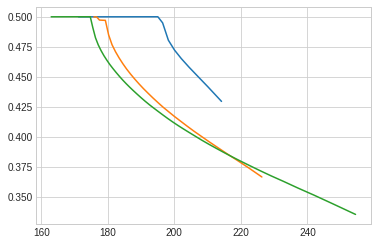

In [16]:
plt.plot( df_pbe["volume(Ang^3)"].to_numpy(), df_pbe["sn1c"].to_numpy())

plt.plot( df_rvv10["volume(Ang^3)"].to_numpy(), df_rvv10["sn1c"].to_numpy())

plt.plot( df_df2["volume(Ang^3)"].to_numpy(), df_df2["sn1c"].to_numpy())

# Fitando os resultados

In [17]:
B_loa = 31.1
B_linha_loa = 8.04

In [18]:
volume, pressao = gera_dados("./../LOA_PV.csv")
pressao = np.array(pressao)
volume = np.array(volume)

In [19]:
def davis_gordom(P, B, dB, V_inicial):
    """Davis-Gordom equation with V in function of P. P is the pressure, B is the bulk modulus
    and dB is the pressure bulk modulus derivative"""
    
    
    V0 = V_inicial
    raiz = np.sqrt(1 + ((dB - 1) * 2 * P) / B)
    func = V0 * ((dB - 1) / (dB - 2 + raiz))
    
    return func


def davis_gordom2(V, B, dB, V_inicial):
    """Davis-Gordom equation with P in function of V. V is the Volume, B is the bulk modulus
    and dB is the pressure bulk modulus derivative"""
    
    V0 = V_inicial
    razao = (V0 - V) / V
    func = B * razao + 0.5 * B * (dB - 1) * razao ** 2
    
    return func

"""
Os volumes em P = 0 são:
PBE+D2  -> 214.16682
DFT-DF2 -> 254.44583
Rvv10   -> 226.29365
LOA     -> 212.23
"""

'\nOs volumes em P = 0 são:\nPBE+D2  -> 214.16682\nDFT-DF2 -> 254.44583\nRvv10   -> 226.29365\nLOA     -> 212.23\n'

In [20]:
def davis_gordom_error(x, P, P_exp, V_inicial):
    """Davis-Gordom equation with V in function of P. P is the pressure, B is the bulk modulus
    and dB is the pressure bulk modulus derivative
    x[0] = B
    x[1] = dB
    """
    
    V0 = V_inicial
    
    raiz = np.sqrt(1 + ((x[1] - 1) * 2 * P) / x[0])
    
    func = V0 * ((x[1] - 1) / (x[1] - 2 + raiz))
    
    return func - P_exp



In [21]:
from scipy.optimize import least_squares
from sklearn.metrics import r2_score

In [22]:
par_init = np.array([1.0, 2.0])
bounds = (0,np.inf)
res_lsq = least_squares(davis_gordom_error, par_init, bounds=bounds,  args=(pressao, volume, 212.23))

Dados - LOA

B = 30.72 GPa 
B' = 8.28

Variações percentuais com os dados do artigo:
B -> 1.2129 %
B'-> -3.0359 %

Para o fit, o r2 score foi: 0.999880045109803


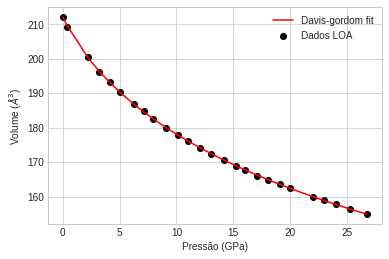

In [23]:
B = res_lsq.x[0]
dB = res_lsq.x[1]
print("Dados - LOA\n")
print("B = {:.2f} GPa \nB' = {:.2f}" .format(B, dB))
print()
diff_b = 100 * (B_loa - B) / B_loa
diff_b_linha = 100 * (B_linha_loa - dB) / B_linha_loa
print("Variações percentuais com os dados do artigo:\nB -> {:.4f} %\nB'-> {:.4f} %" .format(diff_b, diff_b_linha))

r2 = sklearn.metrics.r2_score(volume, davis_gordom(pressao, B, dB, 212.23))
print("\nPara o fit, o r2 score foi: {}" .format(r2))

plt.scatter(pressao, volume, label="Dados LOA", c="black")
plt.plot(pressao, davis_gordom(pressao, B, dB, 212.23), label="Davis-gordom fit", c="red")

plt.xlabel("Pressão (GPa)")
plt.ylabel("Volume ($\AA^3$)")
plt.legend()
plt.show()

A diferença é justificável pelo erro na extração dos dados no gráfico.

In [24]:
def fit_dados(data_frame, eixo_x, eixo_y, V_inicial, IDENTIFICACAO):
    
    pressao = data_frame[eixo_x].to_numpy() / 10
    volume = data_frame[eixo_y].to_numpy()
    
    par_init = np.array([1.0, 2.0])
    bounds = (0,np.inf)
    res_lsq = least_squares(davis_gordom_error, par_init, bounds=bounds,  args=(pressao, volume, V_inicial))
    
    B = res_lsq.x[0]
    dB = res_lsq.x[1]
    
    print(IDENTIFICACAO+"\n")
    print("Valores obtidos para os coeficientes:")
    print("B = {:.2f} GPa \nB' = {:.2f}" .format(res_lsq.x[0], res_lsq.x[1]))
    print()
    diff_b = 100 * (B_loa - res_lsq.x[0]) / B_loa
    diff_b_linha = 100 * (B_linha_loa - res_lsq.x[1]) / B_linha_loa
    print("Variações percentuais com os dados do artigo:\nB -> {:.4f} %\nB' -> {:.4f} %" .format(diff_b, diff_b_linha))
    
    r2 = sklearn.metrics.r2_score(volume, davis_gordom(pressao, B, dB, V_inicial))
    print("\nPara o fit, o r2 score foi: {}" .format(r2))
    
    plt.scatter(pressao, volume, label=IDENTIFICACAO, c="black")
    plt.plot(pressao, davis_gordom(pressao, B, dB, V_inicial), label="Davis-gordom fit", c="red")

    plt.xlabel("Pressão (GPa)")
    plt.ylabel("Volume ($\AA^3$)")
    plt.legend()
    plt.show()

PBE+D2

Valores obtidos para os coeficientes:
B = 27.65 GPa 
B' = 10.93

Variações percentuais com os dados do artigo:
B -> 11.0875 %
B' -> -35.9275 %

Para o fit, o r2 score foi: 0.9983836594634059


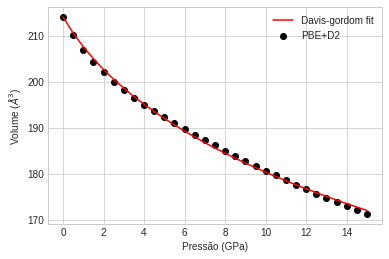

In [25]:
fit_dados(df_pbe, "pressao(Kbar)", "volume(Ang^3)", 214.16682, "PBE+D2")

DFT-DF2

Valores obtidos para os coeficientes:
B = 14.44 GPa 
B' = 10.34

Variações percentuais com os dados do artigo:
B -> 53.5577 %
B' -> -28.6599 %

Para o fit, o r2 score foi: 0.9997499215207444


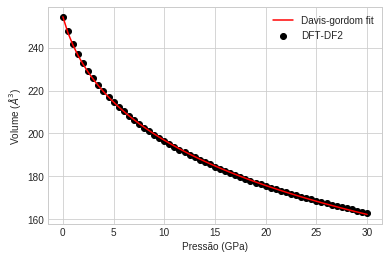

In [26]:
fit_dados(df_df2, "pressao(Kbar)", "volume(Ang^3)", 254.44583, "DFT-DF2")

Rvv10

Valores obtidos para os coeficientes:
B = 26.67 GPa 
B' = 7.56

Variações percentuais com os dados do artigo:
B -> 14.2596 %
B' -> 5.9416 %

Para o fit, o r2 score foi: 0.9999766432551953


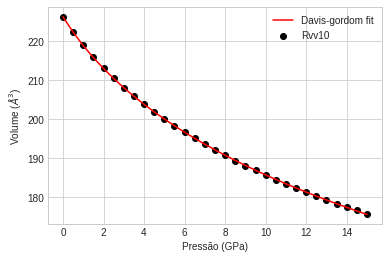

In [27]:
fit_dados(df_rvv10, "pressao(Kbar)", "volume(Ang^3)", 226.29365, "Rvv10")